# Combining Data Using Pandas (Following the previous dection "data aggregation")

### About
In this lesson, we'll show you how to aggregate data with pandas. Here are a couple of takeaways you can expect:
- Different techniques for aggregating data
- Building intuition around the groupby operation

### Goal
Throughout this lesson, we'll try to answer the following questions:
- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?

### Dataset
The dataset is from [World Happiness Report for 2015](https://www.kaggle.com/unsdsn/world-happiness), a CSV file called `World_Happiness_2015.csv`. Here are the descriptions for some of the columns we'll be working with:

- `Country` — name of the country
- `Region` — name of the region the country belongs to
- `Happiness Rank` — the rank of the country, as determined by its happiness score
- `Happiness Score` — a score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
- `Family` — the estimated extent to which family contributes to the happiness score
- `Freedom` — the estimated extent to which freedom contributes to the happiness score
- `Generosity` — the estimated extent to which generosity contributes to the happiness score

### 1. Introduction
Let's start by reading the 2015, 2016, and 2017 reports into a pandas dataframe and adding a `Year` column to each to make it easier to distinguish between them.

In [3]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

### 2. Combining Dataframes with the Concat Function
1. Use the `pd.concat()` function to combine `head_2015` and `head_2016` along axis = 0. Remember to pass the `head_2015` and `head_2016` into the function as a list. Assign the result to `concat_axis0`.

2. Use the `pd.concat()` function to combine `head_2015` and `head_2016` along axis = 1. Remember to pass `head_2015` and `head_2016` into the function as a list and set the axis parameter equal to 1. Assign the result to `concat_axis1`.

3. Use the variable inspector to view `concat_axis0` and `concat_axis1`.
   - Assign the number of rows in `concat_axis0` to a variable called `question1`.
   - Assign the number of rows in `concat_axis1` to a variable called `question2`.

In [4]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0=pd.concat([head_2015,head_2016],axis=0)
concat_axis1=pd.concat([head_2015,head_2016],axis=1)
question1=6
question2=3

### 3. Combining Dataframes with the Concat Function Continued
What happens if the dataframes have different shapes or columns? Let's confirm the `concat()` function's behavior when we combine dataframes that don't have the same shape in the next exercise.
1. Use the `pd.concat()` function to combine `head_2015` and `head_2016` along axis = 0. Assign the result to `concat_axis0`.
2. Assign the number of rows in `concat_axis0` to a variable called `rows`, and the number of columns in concat_axis0 to a variable called `columns`.

In [10]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
# head_2015 and head_2016 have different size
concat_axis0=pd.concat([head_2015,head_2016])
concat_axis1=pd.concat([head_2015,head_2016],axis=1)
# concat pd axis cause nan value
print(concat_axis0.shape) 
# rows=7 and columns=4

(7, 4)


### 4. Combining Dataframes with Different Shapes Using the Concat Function
Use the `pd.concat()` function to combine `head_2015` and `head_2016` along axis = 0 again. This time, however, set the `ignore_index` parameter to `True` to reset the index in the result. Assign the result to `concat_update_index`.

In [11]:
concat_update_index=pd.concat([head_2015,head_2016],ignore_index=True)
print(concat_update_index)

   Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880
4  2016      Denmark            7.526             NaN
5  2016  Switzerland            7.509             NaN
6  2016      Iceland            7.501             NaN


### 5. Joining Dataframes with the Merge Function
Next, we'll explore the `pd.merge()` function - a function that can execute high performance database-style joins. Note that unlike the concat function, the merge function only combines dataframes horizontally (axis=1) and can only combine two dataframes at a time. 

- Use the `pd.merge()` function to join `three_2015` and `three_2016` on the `Country` column. Assign the result to merged.

In [13]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged=pd.merge(left=three_2015, right=three_2016, on='Country')
print(merged)
# merge on countr, keep all info, called 'inner join'

  Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Norway                 4    2015                 4    2016


### 6. Joining on Columns with the Merge Function
Four types of joins:
- Inner: only includes elements that appear in both dataframes with a common key
- Outer: includes all data from both dataframes
- Left: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
- Right: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

Instructions:
1. Update merged to use a left join instead of an inner join. Set the how parameter to `'left'` in `merge()`. Assign the result to `merged_left`.
2. Update `merged_left` so that the 1 parameter equals `three_2016` and the 1 parameter equals `three_2015`. Assign the result to `merged_left_updated`.
3. Based on the results of this exercise, when using a left join, does changing the dataframe assigned to the `left` and `right` parameters change the result? Try to answer this question before moving onto the next screen.

In [14]:
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
merged_left_updated = pd.merge(right=three_2015, left=three_2016, on='Country', how='left')
# For left join, left table have higher priority. 'Country' is followed by left table

print(merged_left)
print(merged_left_updated)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN
   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


### 7. Left Joins with the Merge Function
1. Update `merged` to use the suffixes `_2015` and `_2016`. Set the suffixes parameter to `('_2015', '_2016')` in `merge()`. Assign the result to `merged_suffixes`.
2. Update `merged_updated` to use the suffixes `_2015` and `_2016`. Notice that the "left" dataframe is `three_2016` and the "right" dataframe is `three_2015`. Assign the result to `merged_updated_suffixes`.


In [15]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how = 'left', on='Country', suffixes =('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country', suffixes =('_2016', '_2015'))

### 8. Join on Index with the Merge Function
- Predict the number of `rows` and `columns` the resulting dataframe will have. Assign the number of rows to a variable called `rows` and the number of columns to a variable called `columns`.
- To change the join type used in `merge_index` to a left join, set the `how` parameter equal to `'left'`. Save the result to `merge_index_left`.
- Update `rows` and `columns` so that each contains the correct number of rows and columns in `merge_index_left`.

In [17]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
merge_index_left= pd.merge(left = four_2015,right = three_2016, left_index = True, how='left', right_index = True, suffixes = ('_2015','_2016'))
print(merge_index_left)
# rows=4 and columns=6
# both left_index and right_index are true => keep the most info

  Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   
5      Finland                    6       2015          NaN   

   Happiness Rank_2016  Year_2016  
2                  3.0     2016.0  
3                  4.0     2016.0  
4                  5.0     2016.0  
5                  NaN        NaN  


### 9. Challenge: Combine Data and Create a Visualization
We've already created a Year column in happiness2017 and renamed the Happiness.Score column to Happiness Score.

- Use either the `pd.concat()` function or the `pd.merge()` function to combine `happiness2015`, `happiness2016`, and `happiness2017`. Assign the result to combined.
    - Think about whether you need to combine the data horizontally or vertically in order to create a dataframe that can be grouped by year, and decide which function (`pd.concat()` or `pd.merge()`) you can use to combine the data.
- Use the `df.pivot_table()` method to create a pivot table from the combined dataframe. Set `Year` as the index and `Happiness Score` as the values. Assign the result to `pivot_table_combined`.
- Use the `df.plot()` method to create a bar chart of the results. Set the `kind` parameter to `barh`, the `title` to `'Mean Happiness Scores by Year'`, and the `xlim` parameter to `(0,10)`.
- Try to answer the following question based on the results of this exercise: Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

<AxesSubplot:title={'center':'Mean Happiness Scores by Region'}, ylabel='Year'>

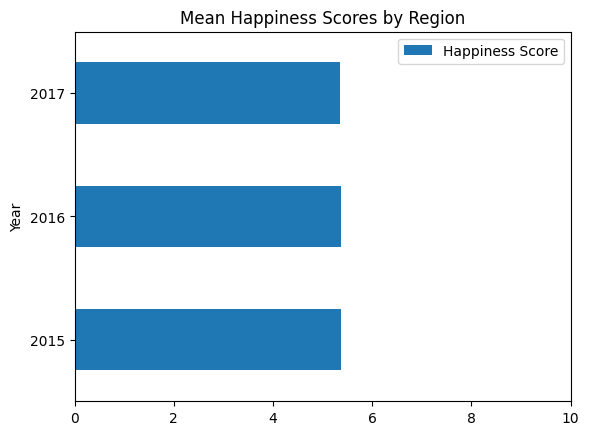

In [19]:
import numpy as np
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
combined=pd.concat([happiness2015,happiness2016,happiness2017])
# use pd.concat() by axis=0 to ensure no data lost
pivot_table_combined=combined.pivot_table(index='Year',values='Happiness Score',aggfunc=np.mean)
# use pivot table to group data by year and aggregate with mean
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))
# draw aggregation result with bar chart